# Part I - (Dataset Exploration Title)
## by David Apine Kwenev

## Introduction
The dataset contains 113,937 records of loans with 81 features on each loan, including loan amount and many others.

The dataset can be downloaded [here](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1678221709762763&usg=AOvVaw2b_sgw5A_aYBCO_k05-0Pi)  

The dataset features are described [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)  

The purpose of this project is to explore a subset of the features and derive some insights, hence not all the features were investigated here.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Reading data into dataframe

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### Observations:
- The dataset contain 81 features (that's a lot)
- There are quite a number of missing values in the dataset  

I will be working with a subset of the features

### What is the structure of your dataset?

The original dataset contains 113937 records and 81 features

### What is/are the main feature(s) of interest in your dataset?

The mean features of interest will be those that are most suitable for predicting the Loan outcome in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that LoanStatus, Occupation, EmploymentStatus, CreditScoreRange (Lower or Upper), BorrowerAPR, IncomeRange, Recommendations, IsBorrowerHomeowner, IncomeVerifiable, and some more will support my investigation.

In [4]:
# Selecting a subset of features to be used in the analysis
features = ['Term' , 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'LoanStatus', 
        'EstimatedEffectiveYield', 'BorrowerAPR', 'BankcardUtilization', 'BorrowerRate', 
        'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
        'ListingCategory (numeric)', 'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
        'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
        'IncomeRange', 'Investors', 'BorrowerState']

loan_df = df[features].copy()
loan_df.columns

Index(['Term', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerAPR',
       'BankcardUtilization', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatus', 'Occupation', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'Recommendations', 'DebtToIncomeRatio',
       'LoanOriginalAmount', 'PercentFunded', 'IncomeRange', 'Investors',
       'BorrowerState'],
      dtype='object')

In [5]:
# rename some of the feature names for simplicity
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric',
                        'ProsperRating (numeric)': 'ProsperRating_Numeric'
                       },
               inplace=True)

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 26 columns):
Term                         113937 non-null int64
PublicRecordsLast10Years     113240 non-null float64
PublicRecordsLast12Months    106333 non-null float64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerAPR                  113912 non-null float64
BankcardUtilization          106333 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating_Numeric        84853 non-null float64
ProsperRating_Alpha          84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory_Numeric      113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
Stated

#### Observation:
- The selected features still have some missing records in them.  

To make things simple, I will drop all null rows from the dataset.

In [7]:
# drop all null rows
loan_df.dropna(inplace=True)

In [8]:
# Descriptive statistics
loan_df.describe()

,Term,PublicRecordsLast10Years,PublicRecordsLast12Months,EstimatedEffectiveYield,BorrowerAPR,BankcardUtilization,BorrowerRate,ProsperRating_Numeric,ProsperScore,ListingCategory_Numeric,EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.283366,0.008528,0.166738,0.223901,0.568286,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.641080,0.104007,0.067595,0.079372,0.301103,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,0.000000,0.000000,-0.181600,0.045830,0.000000,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.000000,0.000000,0.114800,0.161570,0.330000,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.000000,0.000000,0.157670,0.215660,0.610000,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.000000,0.000000,0.219000,0.287800,0.830000,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,38.000000,4.000000,0.319900,0.423950,2.500000,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [9]:
loan_df.Term.unique()

array([36, 60, 12])

In [10]:
#convert term into category datatype
loan_df['Term'] = loan_df['Term'].astype('category')

In [11]:
loan_df.dtypes

Term                         category
PublicRecordsLast10Years      float64
PublicRecordsLast12Months     float64
LoanStatus                     object
EstimatedEffectiveYield       float64
BorrowerAPR                   float64
BankcardUtilization           float64
BorrowerRate                  float64
ProsperRating_Numeric         float64
ProsperRating_Alpha            object
ProsperScore                  float64
ListingCategory_Numeric         int64
EmploymentStatus               object
Occupation                     object
EmploymentStatusDuration      float64
IsBorrowerHomeowner              bool
IncomeVerifiable                 bool
StatedMonthlyIncome           float64
MonthlyLoanPayment            float64
Recommendations                 int64
DebtToIncomeRatio             float64
LoanOriginalAmount              int64
PercentFunded                 float64
IncomeRange                    object
Investors                       int64
BorrowerState                  object
dtype: objec

In [12]:
# save the cleaned final data set for analysis
loan_df.to_csv('loan_df_final.csv',index=False)

## Univariate Exploration

In [13]:
# helper function to make univariate plots
def univariate_plot(data, var, axis = 'x', order=None):
    """
    data: the dataframe from which the data to be plotted is found.
    var: the feature to be plotted.
    """
    base_color = sb.color_palette()[0]
    if axis == 'y':
        sb.countplot(data = data, y = var, color = base_color, order=order);
    else:
        sb.countplot(data = data, x = var, color = base_color, order=order);
    plt.title(f'Distribution of {var} of all the borrowers')

### Question 1.
#### What is the percentage of borrowers who are home owners and that of those who are not?

In [14]:
loan_df['IsBorrowerHomeowner'].value_counts(True)

True     0.543902
False    0.456098
Name: IsBorrowerHomeowner, dtype: float64

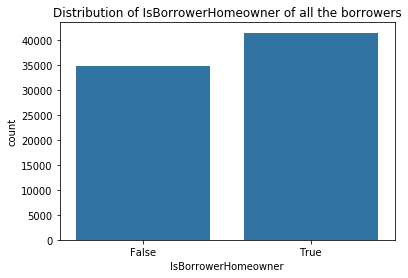

In [15]:
#plt.figure(figsize = [10, 5]) 
univariate_plot(data=loan_df, var='IsBorrowerHomeowner')

### Observation
- About 54% of borrowers are home owners, while 56% of them are not home owners

### Question 2.
#### Which of the IncomeRanges is predominant in the dataset?

In [16]:
loan_df['IncomeRange'].value_counts(normalize=True)

$50,000-74,999    0.310853
$25,000-49,999    0.281056
$100,000+         0.183387
$75,000-99,999    0.177745
$1-24,999         0.046946
Not employed      0.000013
Name: IncomeRange, dtype: float64

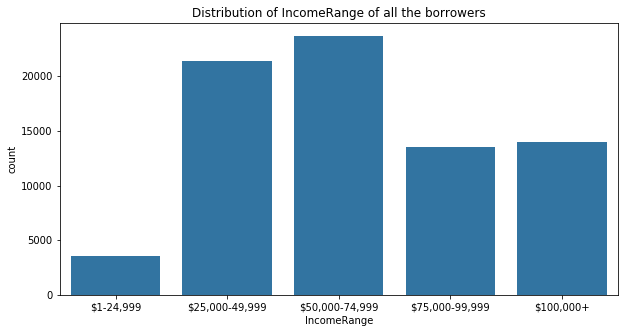

In [17]:
#Make the IncomeRange variable categorical and ordinal
IncomeRanges = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRanges)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)

#plot the IncomeRange
plt.figure(figsize = (10, 5))
univariate_plot(loan_df, 'IncomeRange')

### Observation:
- The Income range **'50,000-74,999'** dollars is predominant with about 23000 records (after null rows have been dropped of course), followed by the **'25,000-49,999'** dollar income range.
- The **'1-24,999'** dollars income range has the least records with less than 5000.

### Question 3
#### What is the percentage of loan distribution by the state of borrowers?

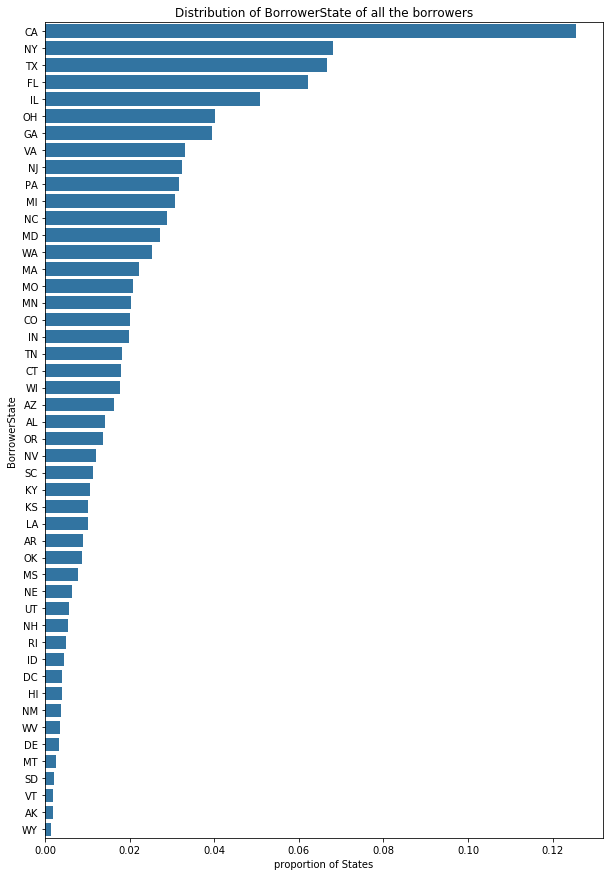

In [18]:
state_counts = loan_df.BorrowerState.value_counts()
state_order = state_counts.index

# Compute largest proportion
max_state_count = state_counts[0]
max_prop = max_state_count / loan_df.shape[0]

# establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

#plot
plt.figure(figsize=(10, 15))
#call the univariate_plot function
univariate_plot(data=loan_df, var='BorrowerState', axis='y', order=state_order)
plt.xticks(tick_props * loan_df.shape[0], tick_names)
plt.xlabel('proportion of States');

### Observation
- The state of **California** recorded the highest number of borrowers with 12% followed by **New York** and **Texas**, while **Wyoming** has the least.

### Question 4
#### What is the percentage distribution of the employment status of the borrowers?

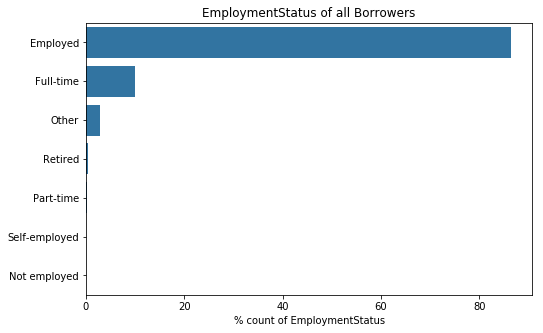

In [19]:
plt.figure(figsize = [8, 5]) 
base_color = sb.color_palette()[0]

emp_status = loan_df.EmploymentStatus.value_counts(normalize=True)

sb.barplot(y=emp_status.index, x=emp_status*100, color = base_color)
plt.xlabel('% count of EmploymentStatus')
plt.title("EmploymentStatus of all Borrowers");             

### Observation
- About 86% of borrowers are employed while the remaining 14% is spread across **Full-time, Retired, Part-time, Self-employed, Not employed, and Other.**

### Question 5
#### What are the top 10 occupation of borrowers in terms of percentages?

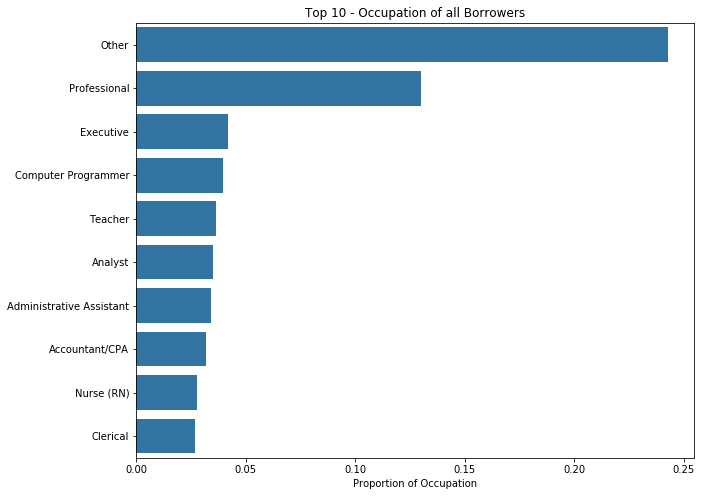

In [20]:
#Occupation
plt.figure(figsize = [10, 8]) 
base_color = sb.color_palette()[0]
occup_counts = loan_df['Occupation'].value_counts(normalize=True).head(10)

sb.barplot(x=occup_counts, y=occup_counts.index, color=base_color);
plt.title("Top 10 - Occupation of all Borrowers");
plt.xlabel('Proportion of Occupation');

#### Observation
About 14% of borrowers are professionals

### Question 6
#### What are to top 5 Listing Categories of the borrowers?

In [21]:
listing_counts = loan_df['ListingCategory_Numeric'].value_counts(normalize=True).head(5)
listing_counts

1    0.637714
7    0.108639
2    0.083027
3    0.047811
6    0.026661
Name: ListingCategory_Numeric, dtype: float64

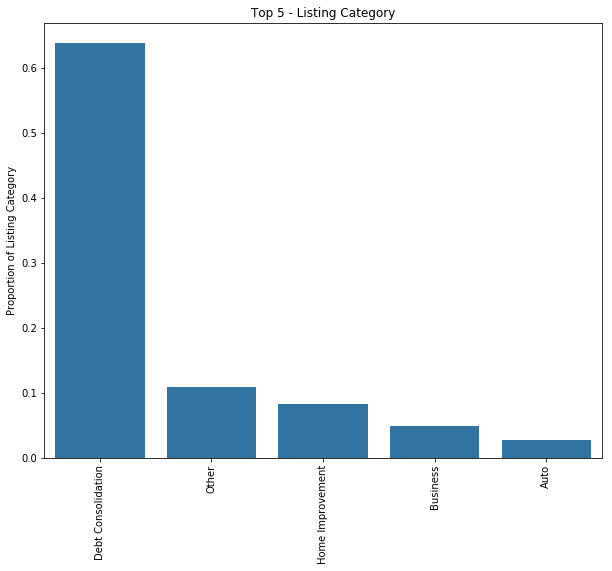

In [22]:
plt.figure(figsize = (10, 8)) 
base_color = sb.color_palette()[0]

xtick_labels = ['Debt Consolidation', 'Other', 'Home Improvement', 'Business', 'Auto']
sb.barplot(x=listing_counts.index, y=listing_counts, color=base_color,
           order=listing_counts.index);
plt.xticks([0,1,2,3,4], xtick_labels, rotation=90)
plt.ylabel('Proportion of Listing Category')
plt.title("Top 5 - Listing Category");

#### Observation
- About 63% of the listing categories are **Debt Consolidation** while less than 10% are for **Business**

### Question 7
#### What Prosper rating (Alpha) is the highest?

In [23]:
loan_df['ProsperRating_Alpha'].value_counts(normalize=True)

C     0.216477
B     0.188661
A     0.176997
D     0.165700
E     0.110777
HR    0.074525
AA    0.066863
Name: ProsperRating_Alpha, dtype: float64

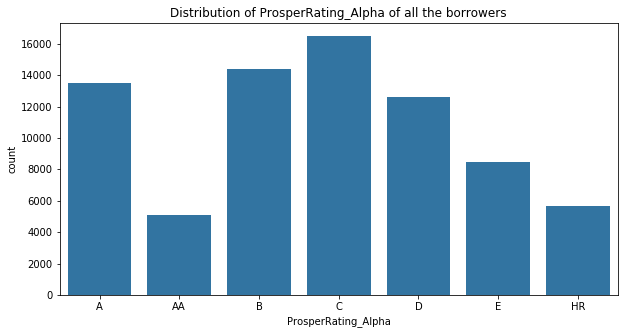

In [24]:
loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category')
plt.figure(figsize = (10, 5)) 
univariate_plot(loan_df, 'ProsperRating_Alpha')

### Observation
- Loans with "AA" ProsperRating_Alpha category has lesser count while those with "C" category has the highest count of about 21%

### Question 8
#### How is the LoanStatus distributed?

In [25]:
loan_df['LoanStatus'].value_counts(normalize=True)

Current                   0.671381
Completed                 0.232064
Chargedoff                0.058308
Defaulted                 0.011612
Past Due (1-15 days)      0.009368
Past Due (31-60 days)     0.004225
Past Due (91-120 days)    0.003634
Past Due (61-90 days)     0.003608
Past Due (16-30 days)     0.003162
FinalPaymentInProgress    0.002454
Past Due (>120 days)      0.000184
Name: LoanStatus, dtype: float64

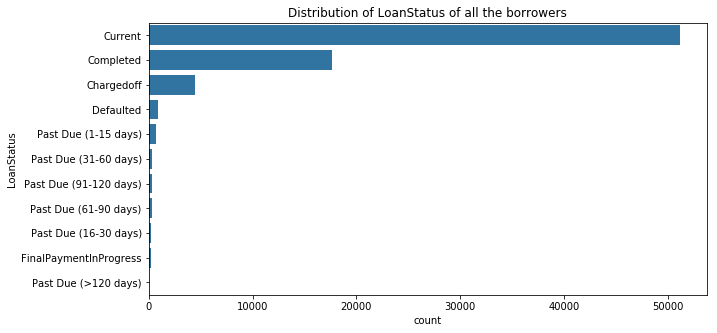

In [26]:
#'LoanStatus'
plt.figure(figsize=(10, 5)) 
univariate_plot(loan_df, var = 'LoanStatus', axis='y', 
                order = loan_df['LoanStatus'].value_counts().index);

### Observation
More than 67% of the LoanStatus is **Current** and about 23% **Completed**

### Question 9
#### What is the highest ProsperScore of the borrowers?

In [27]:
prosper_score = loan_df['ProsperScore'].value_counts(normalize=True)
prosper_score

8.0     0.149995
6.0     0.146373
4.0     0.142044
7.0     0.128792
5.0     0.113401
9.0     0.086439
3.0     0.083631
2.0     0.061326
10.0    0.060355
11.0    0.018264
1.0     0.009381
Name: ProsperScore, dtype: float64

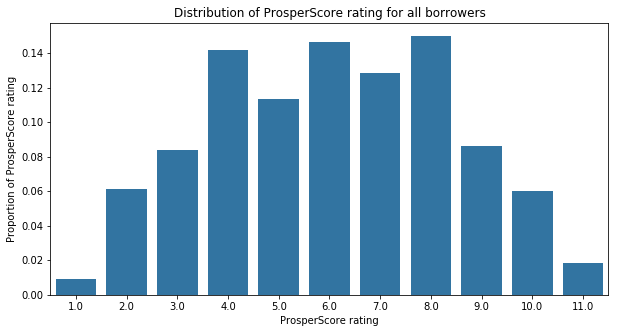

In [28]:
plt.figure(figsize = (10, 5)) 
base_color = sb.color_palette()[0]
sb.barplot(x=prosper_score.index, y=prosper_score, color=base_color,
           order=prosper_score.index.sort_values());
plt.xlabel('ProsperScore rating')
plt.ylabel('Proportion of ProsperScore rating')
plt.title("Distribution of ProsperScore rating for all borrowers");

### Observation
About 15.0% of the borrowers are with a rating score of 8.0 which happened to be the highest, followed by 6.0 and 4.0 with 14.6% and 14.2% respectively

### Question 10
#### What is the distribution of the Stated MOnthly Income of all Borrowers?

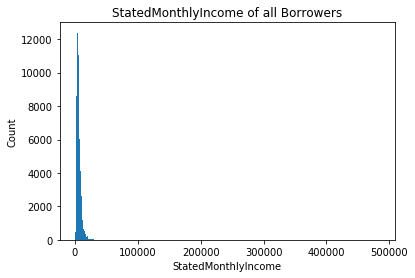

In [29]:
bin_edges = np.arange(0, loan_df['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

#### Observation
- The Stated Monthly Income is highly skewed to the right.

In [30]:
loan_df['StatedMonthlyIncome'].describe()

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

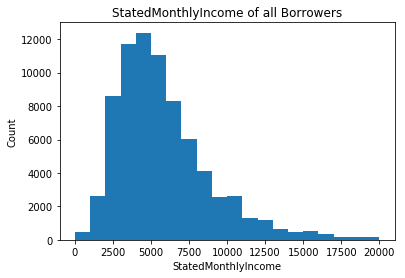

In [31]:
# zooming in closser to see the distribution for the majority of the borrowers
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 20000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers");

In [32]:
np.log10(loan_df['StatedMonthlyIncome'].describe())

count    4.882046
mean     3.778356
std      3.708484
min     -0.602060
25%      3.554287
50%      3.702574
75%      3.860338
max      5.684247
Name: StatedMonthlyIncome, dtype: float64

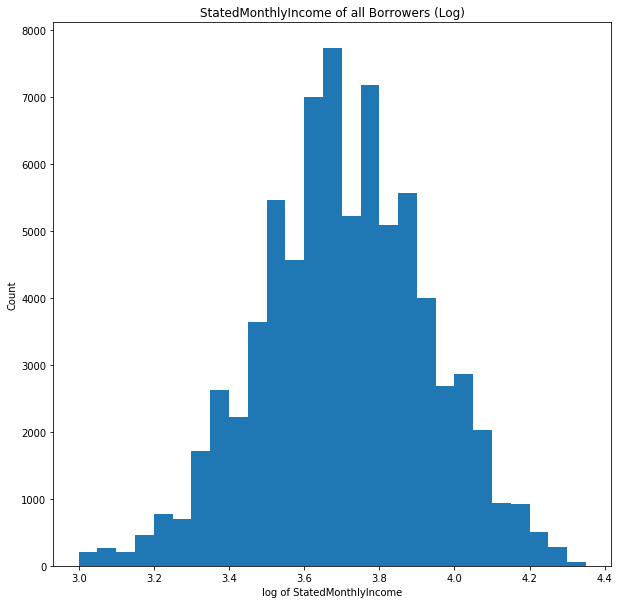

In [33]:
# Viewing the same data as above after its been transformed to log transformation
log_transform = np.log10(loan_df_sub['StatedMonthlyIncome']) # log transform
log_bin_edges = np.arange(3, log_transform.max()+0.05, 0.05)

plt.figure(figsize = (10, 10)) 
plt.hist(log_transform, bins = log_bin_edges)
plt.xlabel('log of StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of all Borrowers (Log)");

### Observation
Majority of the borrowers salary ranges between 2500 to 7500 USD with the peak at 5000 USD.

### Question 11
#### What is the distribution of the Borrower Rate?

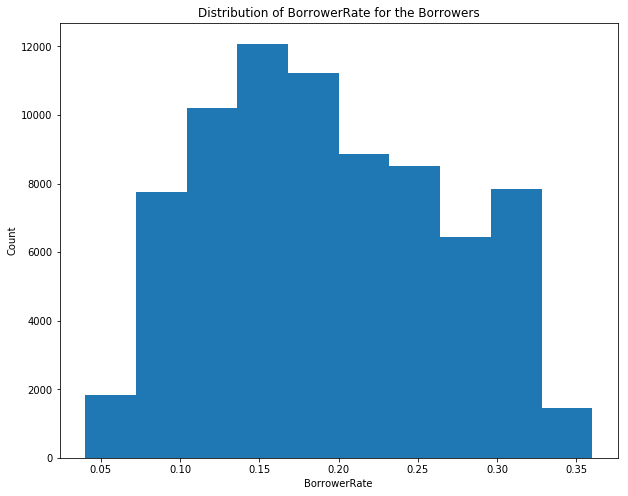

In [34]:
plt.figure(figsize=(10,8))
plt.hist(data = loan_df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("Distribution of BorrowerRate for the Borrowers");

#### Observation
- The borrowers rate follows an approximately unimodal distribution that peaks around 0.16.
- There is a spike in the number of borrowers at the Borrower Rate of about 0.33

### Question 12
#### How is the Employment Status Duration of the borrowers distributed?

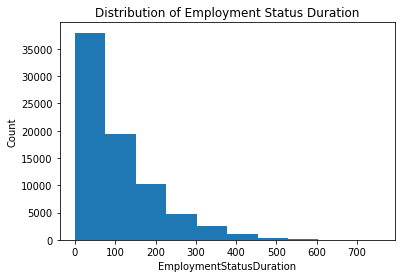

In [35]:
plt.hist(data = loan_df, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("Distribution of Employment Status Duration");

#### Observation
- The Employment Status Duration of the borrowers is heavily skewed to the right.
- Majority of the borrowers have their Employment status duration less than 200.

### Question 13
#### What is the distribution of number of Investors?

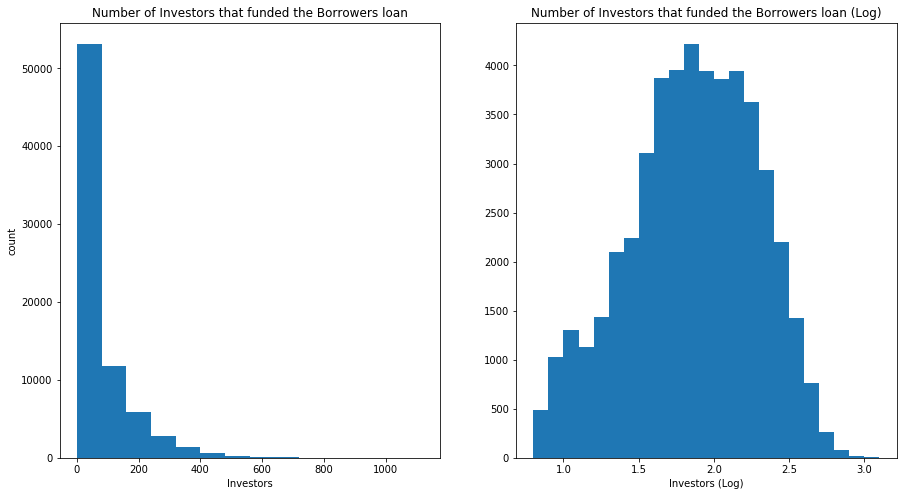

In [36]:
plt.figure(figsize=(15, 8))

# Investors data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 80)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.ylabel('count')
plt.title("Number of Investors that funded the Borrowers loan");

#Distribution of Investors after direct log transformation
plt.subplot(1, 2, 2)
log_transform = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_transform.max()+0.1, 0.1)
plt.hist(log_transform, bins = log_bin_edges)
plt.xlabel('Investors (Log)')
plt.title("Number of Investors that funded the Borrowers loan (Log)");

#### Observation
- Majority of the loans are funded by 100 investors and below.

### Question 14
#### How is the Original Loan Amount distributed?

In [37]:
loan_df['LoanOriginalAmount'].describe()

count    76216.000000
mean      9294.999410
std       6413.404265
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

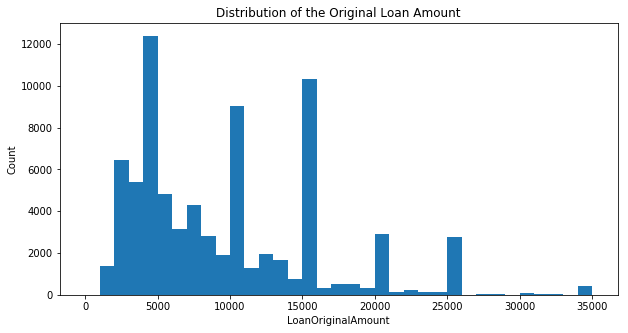

In [38]:
plt.figure(figsize=(10, 5))
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+500, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count');
plt.title("Distribution of the Original Loan Amount");


#### Observation
- The original distribution is a right skewed.
- It has multiple peaks observed at 5000 USD, 10000 USD, 15000 USD, 20000 USD, and 25000 USD.

## Bivariate Exploration

### Question 15
#### How correlated are the following features with one another?
BorrowerRate, BorrowerAPR, ProsperScore, StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount, Investors.

In [39]:
# make a list of features whose correlation is to be examined
features = ['BorrowerRate', 'BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome',
           'MonthlyLoanPayment', 'LoanOriginalAmount', 'Investors']

#compute the correlation scores for the features
corr_data = loan_df[features].corr()

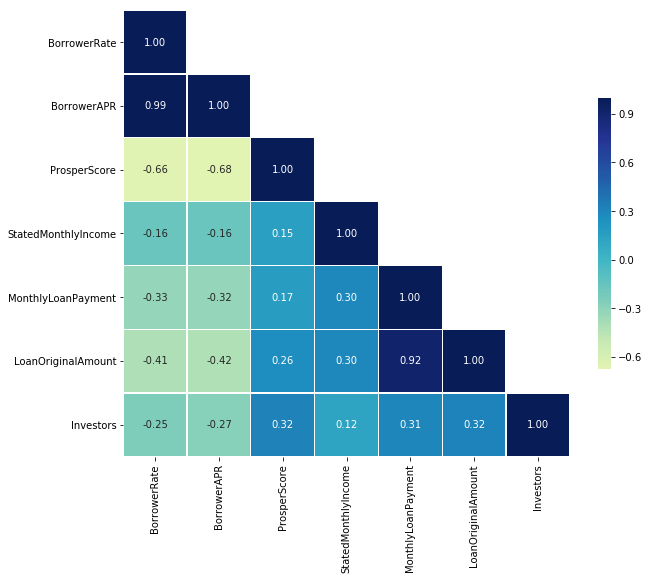

In [40]:
#ref: https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

# plotting correlation heatmap
plt.figure(figsize=(10,10))
mask = np.tril(np.ones_like(corr_data, dtype=bool)) #Generate a mask for the lower triangle
sb.heatmap(corr_data, mask=~mask, cmap="YlGnBu", center=0, annot=True,fmt='.2f',
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
# displaying heatmap
plt.show()

### Observation
- **LoanOriginalAmount** is heavily positively correlated with **MonthlyLoanPayment** as one would expect.
- **BorrowerAPR** and **BorrowerRate** are highly negatively correlated with **ProsperScore**.

### Question 16
#### How does the Income Range of a borrower affect their Loan Amount?

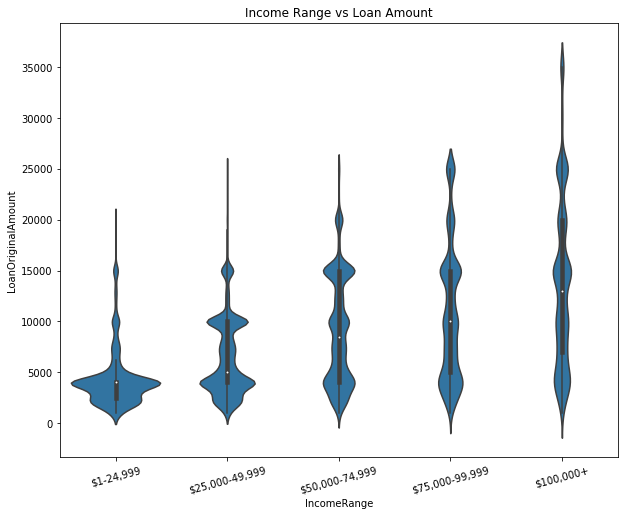

In [41]:

plt.figure(figsize=(10, 8))
base_color = sb.color_palette()[0]

# violin plot
sb.violinplot(data = loan_df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount');

### Observation
- The distribution of Loan amount is multimodal at every Income range.
- On average, the Loan Amount tend to increase with higher income ranges. 

## Multivariate Exploration

### Question 17
#### How did Home owner status and IncomeRange of borrower impact the Loan Amount?

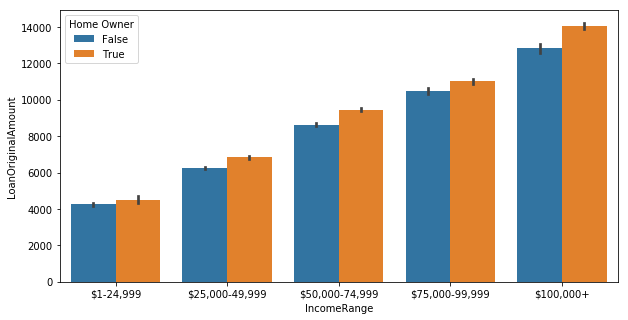

In [42]:
plt.figure(figsize = (10, 5))
sb.barplot(data = loan_df, x = 'IncomeRange', y='LoanOriginalAmount',
           hue = 'IsBorrowerHomeowner')
plt.legend(title='Home Owner');

### Observation
- Home owners consistently have higher Loan Amount across all Income Ranges.

## Conclusions
During the exploration of the dataset, the following insights were drawn:

- About 54% of borrowers are home owners, while 56% of them are not home owners.
- The Income range '50,000-74,999' dollars is predominant with about 23000 records (after null rows have been dropped of course), followed by the '25,000-49,999' dollar income range.
- The '1-24,999' dollars income range has the least records with less than 5000.
- The state of California recorded the highest number of borrowers with 12% followed by New York and Texas, while Wyoming has the least.
- About 86% of borrowers are employed while the remaining 14% is spread across Full-time, Retired, Part-time, Self-employed, Not employed, and Other.
- About 63% of the listing categories are Debt Consolidation while less than 10% are for Business
- Loans with "AA" ProsperRating_Alpha category has lesser count while those with "C" category has the highest count of about 21%
- More than 67% of the LoanStatus is Current and about 23% Completed
- About 15.0% of the borrowers are with a rating score of 8.0 which happened to be the highest, followed by 6.0 and 4.0 with 14.6% and 14.2% respectively
- Majority of the borrowers salary ranges between 2500 to 7500 USD with the peak at 5000 USD.
- Majority of the borrowers have their Employment status duration less than 200.
- Majority of the loans are funded by 100 investors and below.
- The original loan amount tends to peak at 5000 USD, 10000 USD, and 15000 USD
- LoanOriginalAmount is heavily positively correlated with MonthlyLoanPayment as one would expect.
- On average, the Loan Amount tend to increase with higher income ranges.
- Home owners consistently have higher Loan Amount across all Income Ranges.


In [44]:
# converting the notebook to .html
!jupyter nbconvert --to html Part_I_exploration.ipynb 

[NbConvertApp] Converting notebook Part_I_exploration.ipynb to html
[NbConvertApp] Writing 770178 bytes to Part_I_exploration.html
